In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.ensemble import VotingClassifier,BaggingClassifier,RandomForestClassifier
from sklearn.svm  import SVC

In [3]:
df=pd.read_csv('personality_dataset.csv')
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [4]:
df.shape

(2900, 8)

In [5]:
df['Personality']=df['Personality'].map({'Extrovert':1,
'Introvert':0})
df['Stage_fear']=df['Stage_fear'].map({"Yes":1,"No":0})
df['Drained_after_socializing']=df['Drained_after_socializing'].map({"Yes":1,"No":0})

In [6]:
df=df.dropna()
df.isnull().sum()

Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

In [7]:
df.sample(10)

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
603,10.0,1.0,2.0,2.0,1.0,5.0,2.0,0
2487,5.0,1.0,0.0,1.0,1.0,1.0,2.0,0
2836,4.0,1.0,1.0,0.0,1.0,4.0,1.0,0
1880,0.0,0.0,8.0,4.0,0.0,5.0,3.0,1
1624,4.0,1.0,2.0,1.0,1.0,5.0,2.0,0
754,0.0,0.0,5.0,4.0,0.0,12.0,6.0,1
1015,11.0,1.0,3.0,1.0,1.0,1.0,2.0,0
2580,1.0,0.0,8.0,6.0,0.0,10.0,7.0,1
689,9.0,1.0,2.0,2.0,1.0,1.0,2.0,1
1422,10.0,1.0,0.0,2.0,1.0,4.0,1.0,0


In [8]:
x1,x2,y1,y2=train_test_split(df.iloc[:,:7],df.iloc[:,-1],test_size=0.2,random_state=42)

In [9]:
x1

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
2881,4.0,1.0,1.0,2.0,1.0,1.0,2.0
1761,3.0,0.0,8.0,6.0,0.0,10.0,8.0
2888,5.0,1.0,0.0,1.0,1.0,1.0,0.0
1703,2.0,0.0,9.0,4.0,0.0,15.0,5.0
1241,3.0,0.0,8.0,6.0,0.0,12.0,4.0
...,...,...,...,...,...,...,...
1863,3.0,0.0,5.0,6.0,0.0,7.0,4.0
1201,8.0,1.0,3.0,0.0,1.0,0.0,0.0
1238,5.0,1.0,3.0,1.0,1.0,3.0,1.0
1415,5.0,1.0,2.0,2.0,1.0,5.0,2.0


In [10]:
from sklearn.metrics import accuracy_score

In [11]:
lr=LogisticRegression()
lr.fit(x1,y1)
ypred=lr.predict(x2)
accuracy_score(y2,ypred)

0.9274193548387096

In [12]:
dt=DecisionTreeClassifier()
dt.fit(x1,y1)
ypred=dt.predict(x2)
accuracy_score(y2,ypred)

0.8870967741935484

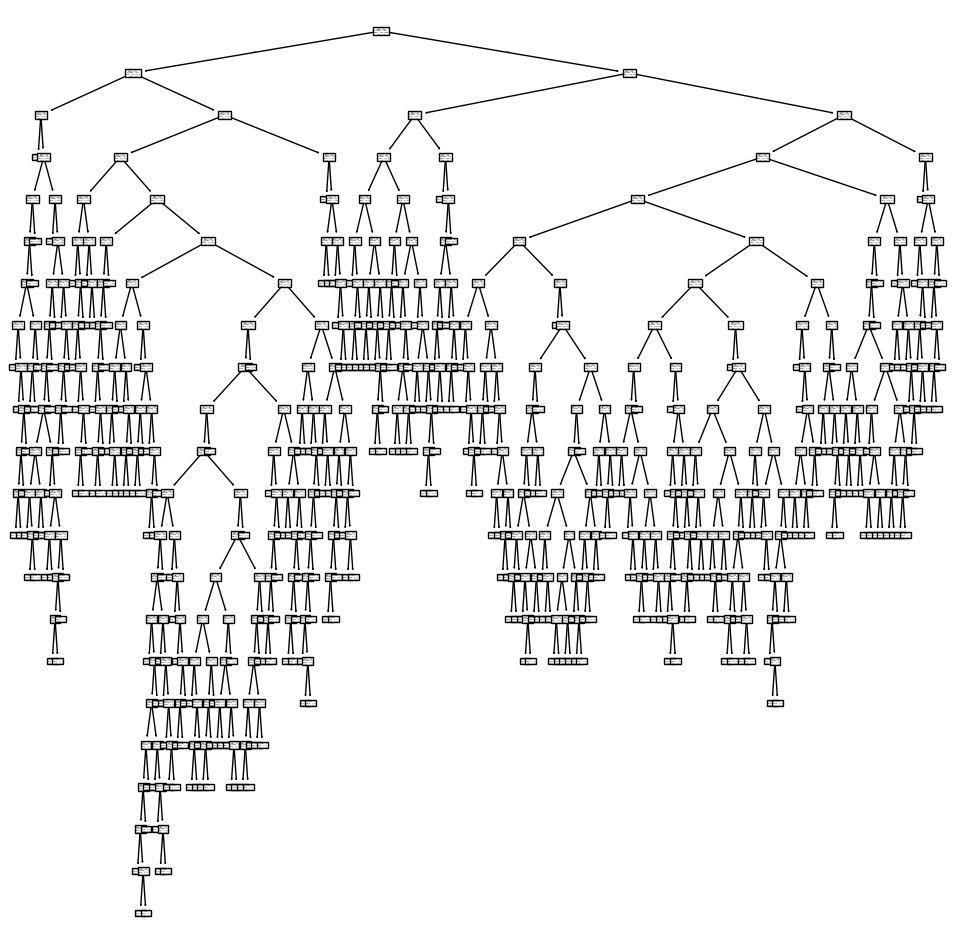

In [13]:
plt.figure(figsize=(12,12))
plot_tree(dt,class_names=True)
plt.show()

In [61]:
X_plot = x1[['Time_spent_Alone', 'Post_frequency']]  
y_plot = y1

In [62]:
dt1=DecisionTreeClassifier()
dt1.fit(X_plot,y1)


DecisionTreeClassifier()

C:\Users\Asus\AppData\Roaming\Python\Python313\site-packages\sklearn\inspection\_plot\decision_boundary.py:194: UserWarning: The following kwargs were not used by contour: 'response'
  self.surface_ = plot_func(self.xx0, self.xx1, self.response, **kwargs)


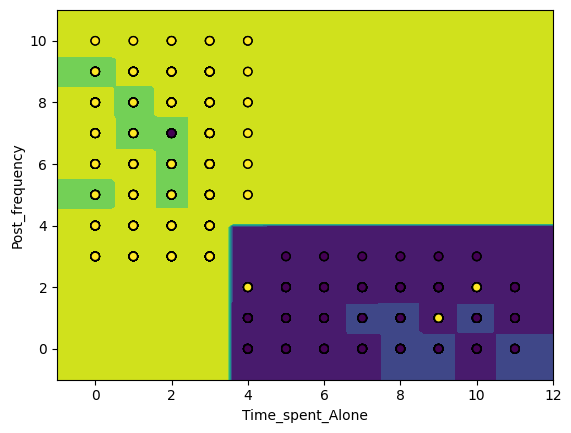

In [63]:
trees=DecisionBoundaryDisplay.from_estimator(dt1,X_plot,response=ypred)
trees.ax_.scatter(
    X_plot.iloc[:, 0], X_plot.iloc[:, 1],
    c=y_plot, edgecolor="black"
)
plt.show()

In [15]:
sv=SVC()
sv.fit(x1,y1)
ypred=dt.predict(x2)
accuracy_score(y2,ypred)

0.8870967741935484

In [16]:
vc=VotingClassifier(estimators=[
        ('lr', lr), ('dt', dt), ('svc', sv)], voting='hard')
vc.fit(x1,y1)
ypred1=vc.predict(x2)
accuracy_score(y2,ypred1)

0.9274193548387096

In [17]:
# vc=VotingClassifier(estimators=[
#         ('lr', lr), ('dt', dt), ('svc', sv)], voting='soft')
# vc.fit(x1,y1)
# ypred1=vc.predict(x2)
# accuracy_score(y2,ypred1)

# BAGGING 


# row sampling without replacement

Bagging with logistic regression without replacement and row sampling

In [18]:
bg=BaggingClassifier(estimator=lr,max_samples=500,bootstrap=False,n_jobs=-1)
bg.fit(x1,y1)

BaggingClassifier(bootstrap=False, estimator=LogisticRegression(),
                  max_samples=500, n_jobs=-1)

In [19]:
ypred=bg.predict(x2)
accuracy_score(y2,ypred)

0.9274193548387096

Bagging with Decision tree without replacement and row sampling

In [20]:
bg=BaggingClassifier(max_samples=500,bootstrap=False,n_jobs=-1)
bg.fit(x1,y1)
ypred=bg.predict(x2)
accuracy_score(y2,ypred)

0.905241935483871

Bagging with Support vector classifier without replacement and row sampling

In [21]:
bg=BaggingClassifier(estimator=sv,max_samples=500,bootstrap=False,n_jobs=-1)
bg.fit(x1,y1)
ypred=bg.predict(x2)
accuracy_score(y2,ypred)

0.9274193548387096

# column sampling with replacement

linear regression with features sampling with replacement

In [22]:
bg=BaggingClassifier(estimator=lr,max_features=5,bootstrap=True,oob_score=True,n_jobs=-1)
bg.fit(x1,y1)
ypred=bg.predict(x2)
accuracy_score(y2,ypred)

C:\Users\Asus\AppData\Roaming\Python\Python313\site-packages\sklearn\ensemble\_bagging.py:865: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
C:\Users\Asus\AppData\Roaming\Python\Python313\site-packages\sklearn\ensemble\_bagging.py:871: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


0.9274193548387096

In [23]:
bg.estimators_features_

[array([6, 3, 2, 5, 4], dtype=int32),
 array([1, 2, 0, 6, 3], dtype=int32),
 array([3, 0, 6, 2, 4], dtype=int32),
 array([4, 1, 6, 2, 0], dtype=int32),
 array([0, 3, 1, 2, 4], dtype=int32),
 array([6, 5, 1, 4, 0], dtype=int32),
 array([1, 3, 0, 2, 4], dtype=int32),
 array([3, 1, 4, 2, 5], dtype=int32),
 array([0, 2, 3, 5, 4], dtype=int32),
 array([2, 0, 5, 1, 3], dtype=int32)]

In [24]:
bg.oob_score_

0.9202423018677436

decision tree with features sampling with replacement

In [25]:
bg=BaggingClassifier(n_estimators=175,max_features=5,bootstrap=True,oob_score=True,n_jobs=-1)
bg.fit(x1,y1)
ypred=bg.predict(x2)
accuracy_score(y2,ypred)

0.9274193548387096

In [26]:
bg.estimators_features_

[array([4, 6, 1, 0, 5], dtype=int32),
 array([6, 4, 2, 0, 3], dtype=int32),
 array([2, 5, 4, 1, 6], dtype=int32),
 array([3, 1, 4, 6, 2], dtype=int32),
 array([2, 6, 0, 5, 1], dtype=int32),
 array([3, 5, 6, 2, 4], dtype=int32),
 array([4, 1, 5, 6, 0], dtype=int32),
 array([3, 6, 4, 1, 5], dtype=int32),
 array([4, 2, 6, 1, 5], dtype=int32),
 array([0, 4, 5, 2, 6], dtype=int32),
 array([1, 5, 6, 4, 2], dtype=int32),
 array([4, 6, 0, 5, 1], dtype=int32),
 array([0, 3, 5, 1, 2], dtype=int32),
 array([0, 6, 3, 2, 4], dtype=int32),
 array([0, 1, 4, 5, 2], dtype=int32),
 array([6, 2, 5, 3, 0], dtype=int32),
 array([0, 2, 6, 4, 5], dtype=int32),
 array([0, 6, 2, 4, 5], dtype=int32),
 array([6, 3, 0, 1, 5], dtype=int32),
 array([4, 0, 3, 2, 5], dtype=int32),
 array([0, 4, 5, 1, 2], dtype=int32),
 array([0, 2, 6, 5, 3], dtype=int32),
 array([5, 6, 0, 4, 2], dtype=int32),
 array([4, 5, 2, 0, 6], dtype=int32),
 array([1, 6, 2, 0, 4], dtype=int32),
 array([2, 5, 3, 1, 6], dtype=int32),
 array([1, 6

In [27]:
bg.oob_score_

0.9237758707723372

support vector classifier with features sampling without replacement

In [28]:
bg=BaggingClassifier(estimator=sv,n_estimators=100,max_features=6,bootstrap=False,n_jobs=-1)
bg.fit(x1,y1)
ypred=bg.predict(x2)
accuracy_score(y2,ypred)

0.9274193548387096

In [29]:
bg.estimators_features_

[array([1, 3, 0, 6, 2, 4], dtype=int32),
 array([0, 4, 2, 1, 3, 5], dtype=int32),
 array([1, 4, 6, 0, 3, 2], dtype=int32),
 array([1, 4, 0, 3, 5, 2], dtype=int32),
 array([4, 2, 1, 3, 0, 5], dtype=int32),
 array([6, 1, 3, 4, 2, 0], dtype=int32),
 array([3, 6, 5, 4, 1, 0], dtype=int32),
 array([5, 6, 2, 1, 4, 3], dtype=int32),
 array([2, 6, 0, 1, 5, 4], dtype=int32),
 array([3, 1, 5, 0, 2, 6], dtype=int32),
 array([3, 1, 5, 6, 2, 4], dtype=int32),
 array([0, 2, 5, 3, 4, 1], dtype=int32),
 array([3, 0, 6, 4, 1, 5], dtype=int32),
 array([4, 3, 0, 5, 2, 6], dtype=int32),
 array([6, 1, 5, 2, 3, 0], dtype=int32),
 array([4, 2, 0, 6, 3, 5], dtype=int32),
 array([3, 2, 6, 5, 4, 1], dtype=int32),
 array([5, 6, 1, 2, 0, 3], dtype=int32),
 array([2, 0, 3, 1, 4, 5], dtype=int32),
 array([3, 1, 2, 4, 6, 5], dtype=int32),
 array([0, 1, 3, 5, 4, 2], dtype=int32),
 array([0, 3, 5, 4, 2, 1], dtype=int32),
 array([0, 4, 5, 1, 3, 6], dtype=int32),
 array([0, 6, 5, 4, 1, 2], dtype=int32),
 array([5, 2, 4,

In [45]:
rf=RandomForestClassifier()
bg=BaggingClassifier(estimator=rf,n_estimators=100,max_features=5,max_samples=700,bootstrap=True,oob_score=True,n_jobs=-1)
bg.fit(x1,y1)
ypred=bg.predict(x2)
accuracy_score(y2,ypred)

0.9274193548387096

In [46]:
bg.estimators_features_

[array([2, 4, 3, 0, 6], dtype=int32),
 array([0, 1, 4, 3, 2], dtype=int32),
 array([5, 6, 3, 1, 0], dtype=int32),
 array([3, 5, 6, 1, 2], dtype=int32),
 array([3, 2, 0, 5, 1], dtype=int32),
 array([0, 4, 1, 2, 5], dtype=int32),
 array([2, 3, 6, 4, 1], dtype=int32),
 array([1, 3, 6, 2, 5], dtype=int32),
 array([6, 4, 2, 1, 5], dtype=int32),
 array([2, 3, 5, 6, 0], dtype=int32),
 array([1, 0, 5, 4, 2], dtype=int32),
 array([2, 1, 5, 0, 6], dtype=int32),
 array([4, 0, 1, 6, 3], dtype=int32),
 array([2, 4, 6, 5, 3], dtype=int32),
 array([4, 2, 3, 6, 0], dtype=int32),
 array([3, 6, 1, 0, 2], dtype=int32),
 array([6, 5, 2, 3, 4], dtype=int32),
 array([1, 6, 2, 0, 3], dtype=int32),
 array([4, 0, 2, 5, 6], dtype=int32),
 array([0, 3, 5, 2, 6], dtype=int32),
 array([2, 0, 1, 6, 5], dtype=int32),
 array([4, 6, 2, 0, 3], dtype=int32),
 array([2, 3, 4, 1, 6], dtype=int32),
 array([3, 2, 0, 1, 6], dtype=int32),
 array([4, 2, 5, 6, 1], dtype=int32),
 array([0, 4, 3, 1, 6], dtype=int32),
 array([2, 1

In [55]:
# bg.estimators_samples_

In [48]:
bg.oob_score_

0.9247854618879354

# Random Forrest

without replacement


In [49]:
rf=RandomForestClassifier(n_estimators=234,bootstrap=False,max_features=4)
rf.fit(x1,y1)
ypred=rf.predict(x2)
accuracy_score(y2,ypred)

0.8951612903225806

In [50]:
rf.feature_importances_

array([0.07511624, 0.28576907, 0.13598082, 0.02943029, 0.35723334,
       0.06449254, 0.05197769])

with replacement


In [51]:
rf=RandomForestClassifier(n_estimators=100,bootstrap=True,max_samples=700,oob_score=True)
rf.fit(x1,y1)
ypred=rf.predict(x2)
accuracy_score(y2,ypred)

0.9213709677419355

In [52]:
rf.oob_score_

0.9202423018677436

both row and column sampling 

In [53]:
rf=RandomForestClassifier(n_estimators=100,bootstrap=True,max_samples=700,oob_score=True,max_features=5)
rf.fit(x1,y1)
ypred=rf.predict(x2)
accuracy_score(y2,ypred)

0.9193548387096774

In [54]:
rf.feature_importances_

array([0.07400916, 0.3636209 , 0.07716962, 0.0386032 , 0.3299335 ,
       0.0673419 , 0.04932172])